Pour commencer, il faut [télécharger la vidéo](https://youtu.be/BWraEDaVXZM) produite par le _Technical Services Group_ du département de physique du [MIT](https://web.mit.edu/). Je ne peux pas vous dire _comment_ télécharger cette vidéo, mais vous trouverez sans doute !

Il faut ensuite extraire les images qui nous intéressent. Pour cela, j'ai utilisé la boîte à outils [`FFMpeg`](https://www.ffmpeg.org/) qui fournit tout ce dont on a besoin pour manipuler une vidéo. `FFMpeg` présente en outre l'avantage d'être multi-plateforme, ce qui signifie que ces outils fonctionnent sous linux, macos ou windows. Un certain nombre de ces images sont stockées sur le serveur qui héberge ce _notebook_ dans le répertoire `media/echelle-perroquet`. Elles sont nommées `TSG-perroquet000034.jpg`, `TSG-perroquet000035.jpg`, ..., `TSG-perroquet000056.jpg`. Ce sont des images successives extraites de la vidéo.

Nous allons avoir besoin d'un certain nombre de bibliothèques. Comme d'habitude, on utilise `numpy` et `matplotlib`. On aura aussi besoin du paquet [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) de la bibliothèque `scipy` qui permettra d'accéder à [`linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) afin de réaliser une régression linéaire.

In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

Pour réaliser le traitement des images, nous allons nous servir d'une nouvelle bibliothèque : [`skimage`](http://scikit-image.org/docs/stable/). 

* Dans le paquet [`skimage.io`](http://scikit-image.org/docs/stable/api/skimage.io.html), on se servira, d'une part, d'[`imread`](http://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread) (_image read_) qui permet de lire un fichier image et de stocker son contenu dans une variable et, d'autre part, d'[`imshow`](http://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imshow) sui permet d'afficher une image.
* Dans le paquet [`skimage.color`](http://scikit-image.org/docs/stable/api/skimage.color.html), on se servira de [`rgb2gray`](http://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) qui permet d'obtenir la luminance associée à une image.
* Dans le paquet [`skimage.feature`](http://scikit-image.org/docs/stable/api/skimage.feature.html), on se servira de [`blob_doh`](http://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_doh) qui permet de détecter la position de « points lumineux » dans une image étant donné sa luminance.

In [2]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.feature import blob_doh

Je te propose dans un premier temps de visualiser une image « brute ». Par exemple, affichons la première de la série.

La prochaine cellule « stocke » l'image dans le `ndarray` `image`.

In [3]:
image = imread('../media/echelle-perroquet/TSG-perroquet000034.jpg')

L'attribut `shape` permet de connaître la forme, c'est-à-dire la dimension, du `ndarray`.

In [4]:
image.shape

(720, 1280, 3)

On constate qu'il s'agit d'une image de `720` pixels en hauteur sur `1280` pixels en largeur. Note que c'est d'abord l'ordonnée /puis/ l'abscisse... Chaque pixel possède trois informations correspondant à la couleur : une information pour le rouge (_red_), une pour le vert (_green_) et une pour le bleu (_blue_). C'est le codage dit `rgb` de la couleur.

Ensuite, on définit une figure `fig` et un système d'axes (abscisses et ordonnées) _via_ la commande `subplots` de `pyplot` (tu te rappelles : `plt` est l'alias de `pyplot`). Une fois le système d'axes défini, on peut y afficher l'image `image` à l'aide d'`imshow`.

<IPython.core.display.Javascript object>


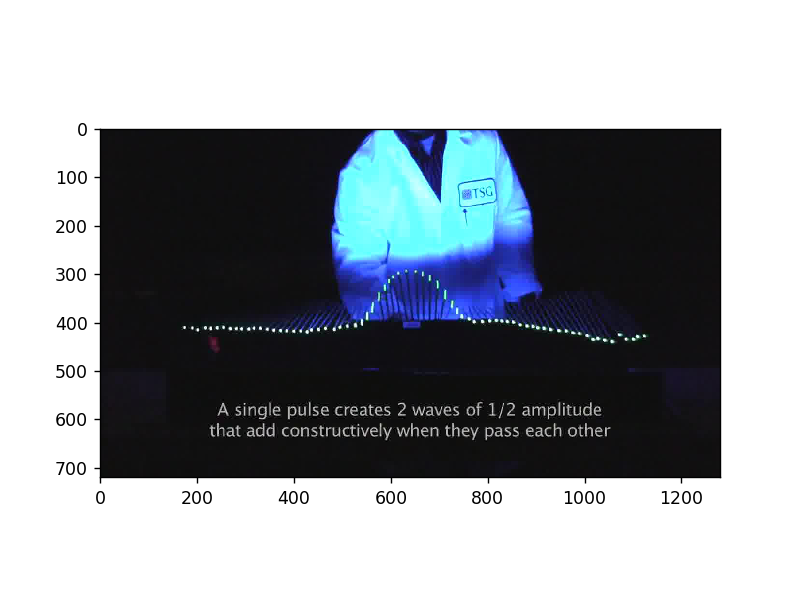

In [5]:
fig, ax = plt.subplots()
ax.imshow(image, interpolation = 'nearest')

Et voilà ! Bon, on voit que toute l'image n'est pas utile pour l'exploitation de l'expérience. On va donc ne s'intéresser qu'à une portion de l'image. J'ai choisi, un peu arbitrairement, les pixels compris, en ordonnées, entre les indices `280` et `550` (non compris) et, en abscisses, entre les indices `150` et `1150` (non compris). C'est le sens de la notation `image[280:550, 150:1150, :]`. Le dernier `:` sans « bornes » signifie que l'on prend toute l'information de cette dimension du `ndarray`, c'est-à-dire toute l'information de couleur pour chaque pixel.

In [6]:
image2 = image[280:550, 150:1150, :]

Affichons-là.

<IPython.core.display.Javascript object>


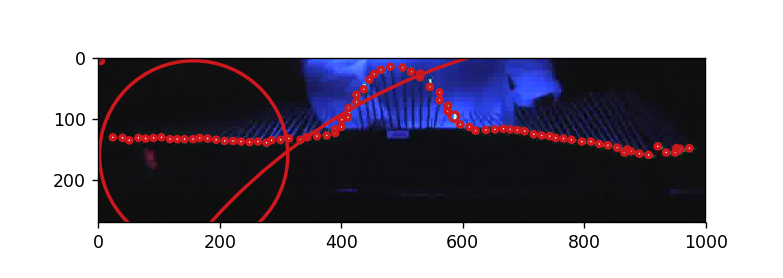

In [7]:
fig, ax = plt.subplots()
ax.imshow(image2, interpolation = 'nearest')

Détectons les points lumineux à l'aide de `blob_doh` de la bibliothèque `skimage`. Je ne m'en sers pas tous les jours de cette bibliothèques. Je me suis donc nettement inspiré de ce que tu peux trouver dans la [documentation](http://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html). Pour être tout à fait honnête, les valeurs données à `max_sigma` et à `threshold` ont été trouvée par une méthode rudimentaire d'essais/erreurs. Si tu veux, tu peux les modifier pour voir ce que ça change.

In [8]:
image2_gray = rgb2gray(image2)
blob = blob_doh(image2_gray, max_sigma = 30, threshold = .005)

Le résultat de la recherche est stockée dans `blob`. Il s'agit d'un `ndarray` contenant trois informations par points : son ordonnée, son abscisse et son rayon.

In [12]:
x = blob[:, 1]
y = blob[:, 0]
r = blob[:, 2]

for i in range(len(y)):
    c = plt.Circle((x[i], y[i]), r[i], color = '#CE181E', linewidth = 2, fill = False)
    ax.add_patch(c)

In [11]:
blob.shape

(81, 3)